In [1]:
from sklearn.datasets import load_breast_cancer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90) 
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
 
score_pre
 
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以 上的准确率 

0.9648809523809524

0.9631265664160402 71


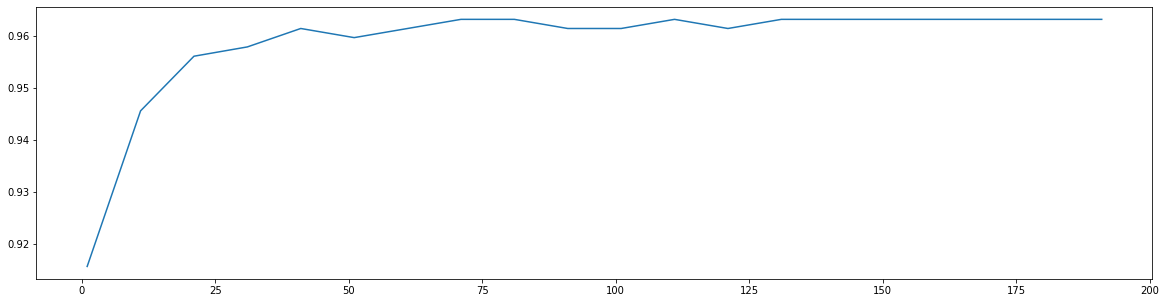

In [11]:
#随机森林调整的第一步：无论如何先来调n_estimators
#在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势 
#我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息 
#第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何 引起模型整体准确率的变化 
#####【TIME WARNING: 30 seconds】#####
 
scorel = [] 
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
    
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9613721804511279 41


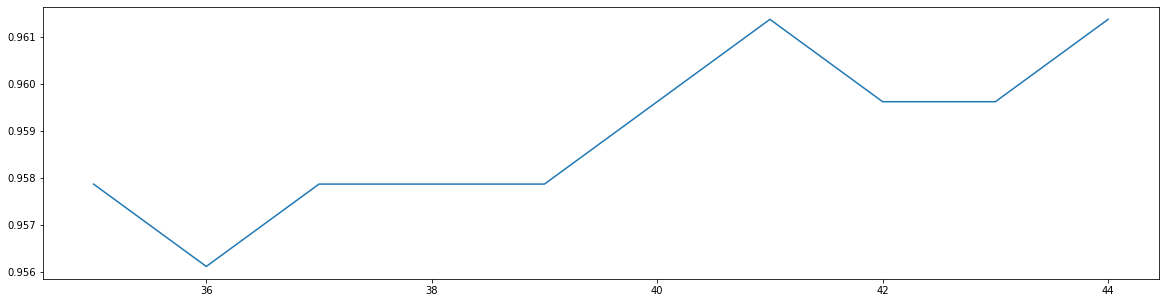

In [19]:
scorel = [] 
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score) 
    
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [20]:
#调整max_depth
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探 
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够 
#   更应该画出学习曲线，来观察深度对模型的影响
 
rfc = RandomForestClassifier(n_estimators=39 ,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=39, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

In [21]:
#调整出来的最佳参数是多少
GS.best_params_

{'max_depth': 6}

In [22]:
#返回最佳参数对应的模型准确率
GS.best_score_ 

0.9631265664160402

In [26]:
#调整max_features
 
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""
 
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。
我 们需要根据调参前，模型所在的位置（在泛化误差低点的左边还是右边）来决定我们要将max_features往哪边调。 
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征越多，模型才会越复杂。
max_features的默认小值是sqrt(n_features)，因此我们使用这个值作为调参范围的 小值。
 
"""
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90  
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=39, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

In [27]:
GS.best_params_

{'max_features': 6}

In [30]:
GS.best_score_

0.968421052631579

In [32]:
#调整min_samples_leaf
 
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
 
#对于min_samples_split和min_samples_leaf,一般是从他们的小值开始向上增加10或20 
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围 
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            ) 

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=39, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

In [33]:
GS.best_params_

{'min_samples_leaf': 4}

In [35]:
GS.best_score_

0.9613721804511279

In [41]:
#调整min_samples_split
 
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=39, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

In [42]:
GS.best_params_

{'min_samples_split': 3}

In [43]:
GS.best_score_

0.9613721804511279

In [45]:
#调整Criterion
 
param_grid = {'criterion':['gini', 'entropy']}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            ) 

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_

0.9649122807017543

In [47]:
rfc = RandomForestClassifier(n_estimators=39,random_state=90) 

score = cross_val_score(rfc,data.data,data.target,cv=10).mean() 

score
 
score - score_pre

-0.007017543859649145

In [54]:
rfc= RandomForestClassifier(n_estimators=68
                         ,random_state=90 
                         ,criterion="gini"
                         ,min_samples_split=8
                         ,min_samples_leaf=1
                         ,max_depth=12
                         ,max_features=2
                         ,max_leaf_nodes=36) 

In [60]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=2,
                       max_leaf_nodes=36, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=68,
                       n_jobs=None, oob_score=False, random_state=90, verbose=0,
                       warm_start=False)

In [61]:
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()

In [62]:
score

0.9613095238095237